<a href="https://colab.research.google.com/github/biohackingmathematician/ADSProject/blob/main/Frog_and_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Collection & Processing

## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [ ]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-10-03 00:35:43--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  16.9MB/s    in 7.0s    

2025-10-03 00:35:52 (12.9 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_file = "/content/frogtail.zip" # path to the downloaded zip file
extract_dir = "/content/frog_tail_data" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/frog_tail_data


In [ ]:
zip_file = extract_dir+"/ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/frog_tail_data


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



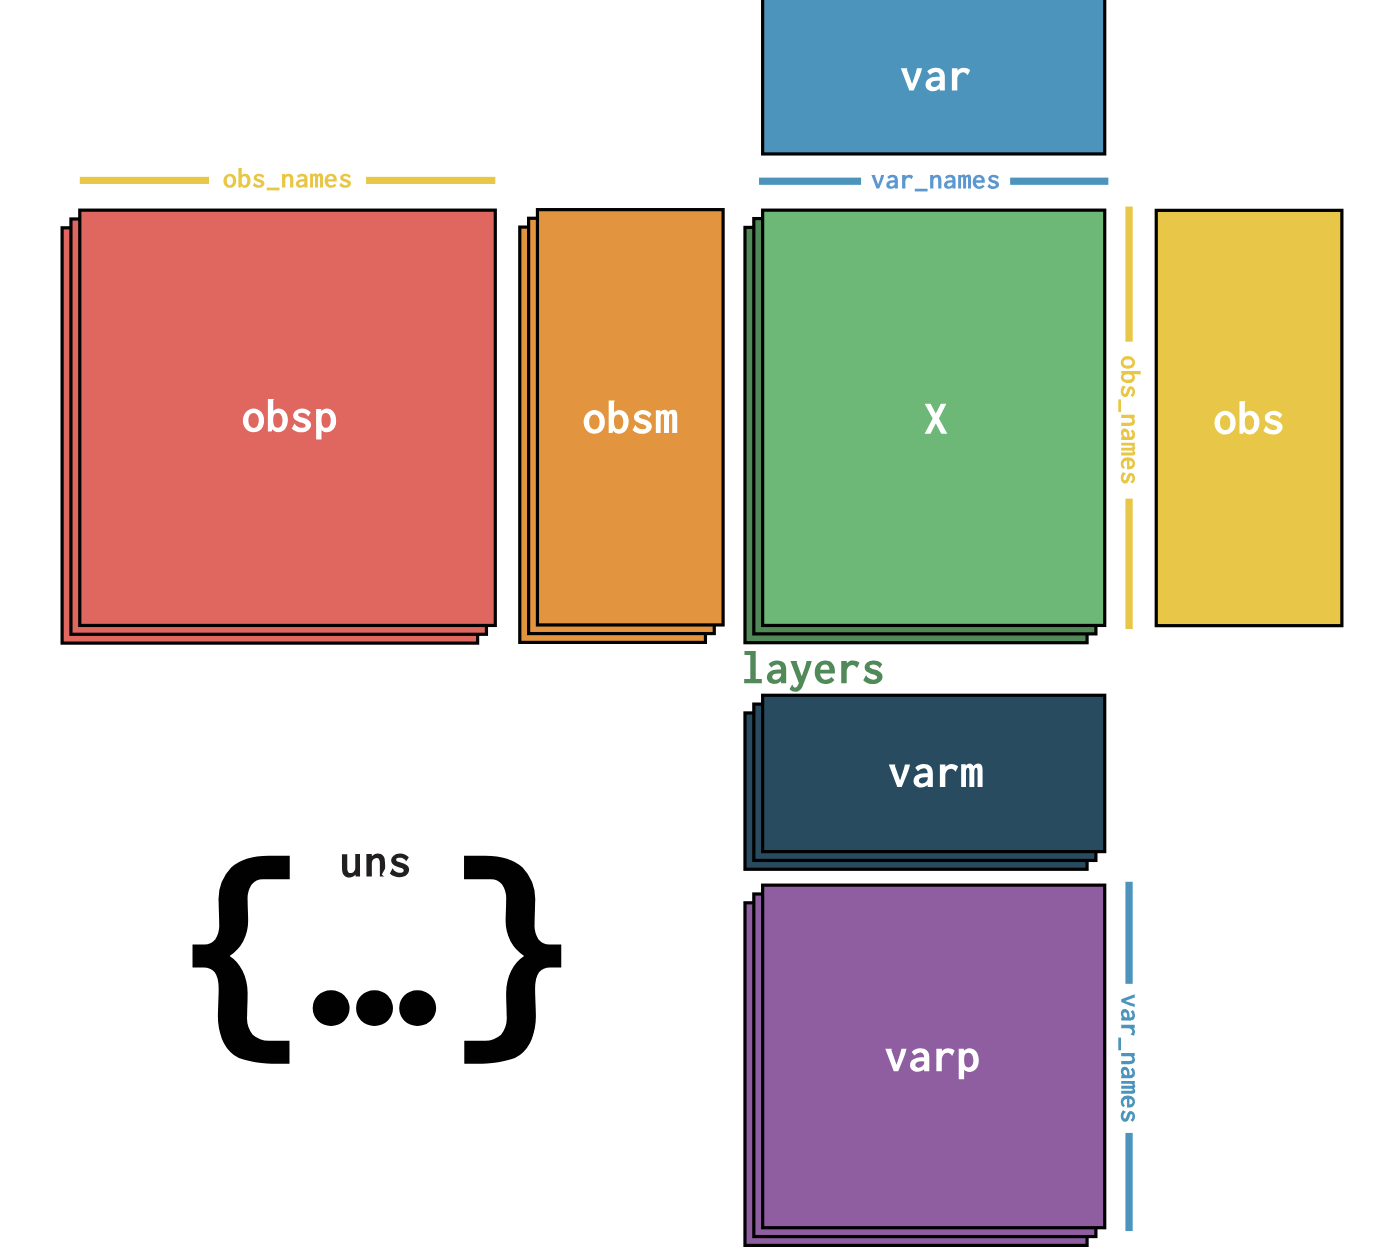

In [ ]:
!pip install anndata
!pip install scanpy

In [ ]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'/ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'/ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'/ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'/ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'/ArrayExpress/meta.csv')


# Convert the matrix to CSR format before creating AnnData
adata = ad.AnnData(X.T.tocsr())

In [ ]:
!pip install numpy==1.26.4

In [ ]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [ ]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


In [ ]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [ ]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [ ]:
adata.X = adata.X.tocsr()

In [ ]:
adata.write_h5ad('/content/frog_tail_datacleaned_processed_frogtail.h5ad')

## Load data

In [ ]:
import anndata as ad
extract_dir = "/content/drive/Shareddrive/STAT5243/Projects/Part 1/Datasets/"
adata = ad.read_h5ad('/content/frog_tail_datacleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [ ]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [ ]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


## Processing data

In [ ]:
adata.layers["counts"] = adata.X.copy()


In [ ]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

filtered out 5369 genes that are detected in less than 3 cells
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:04)


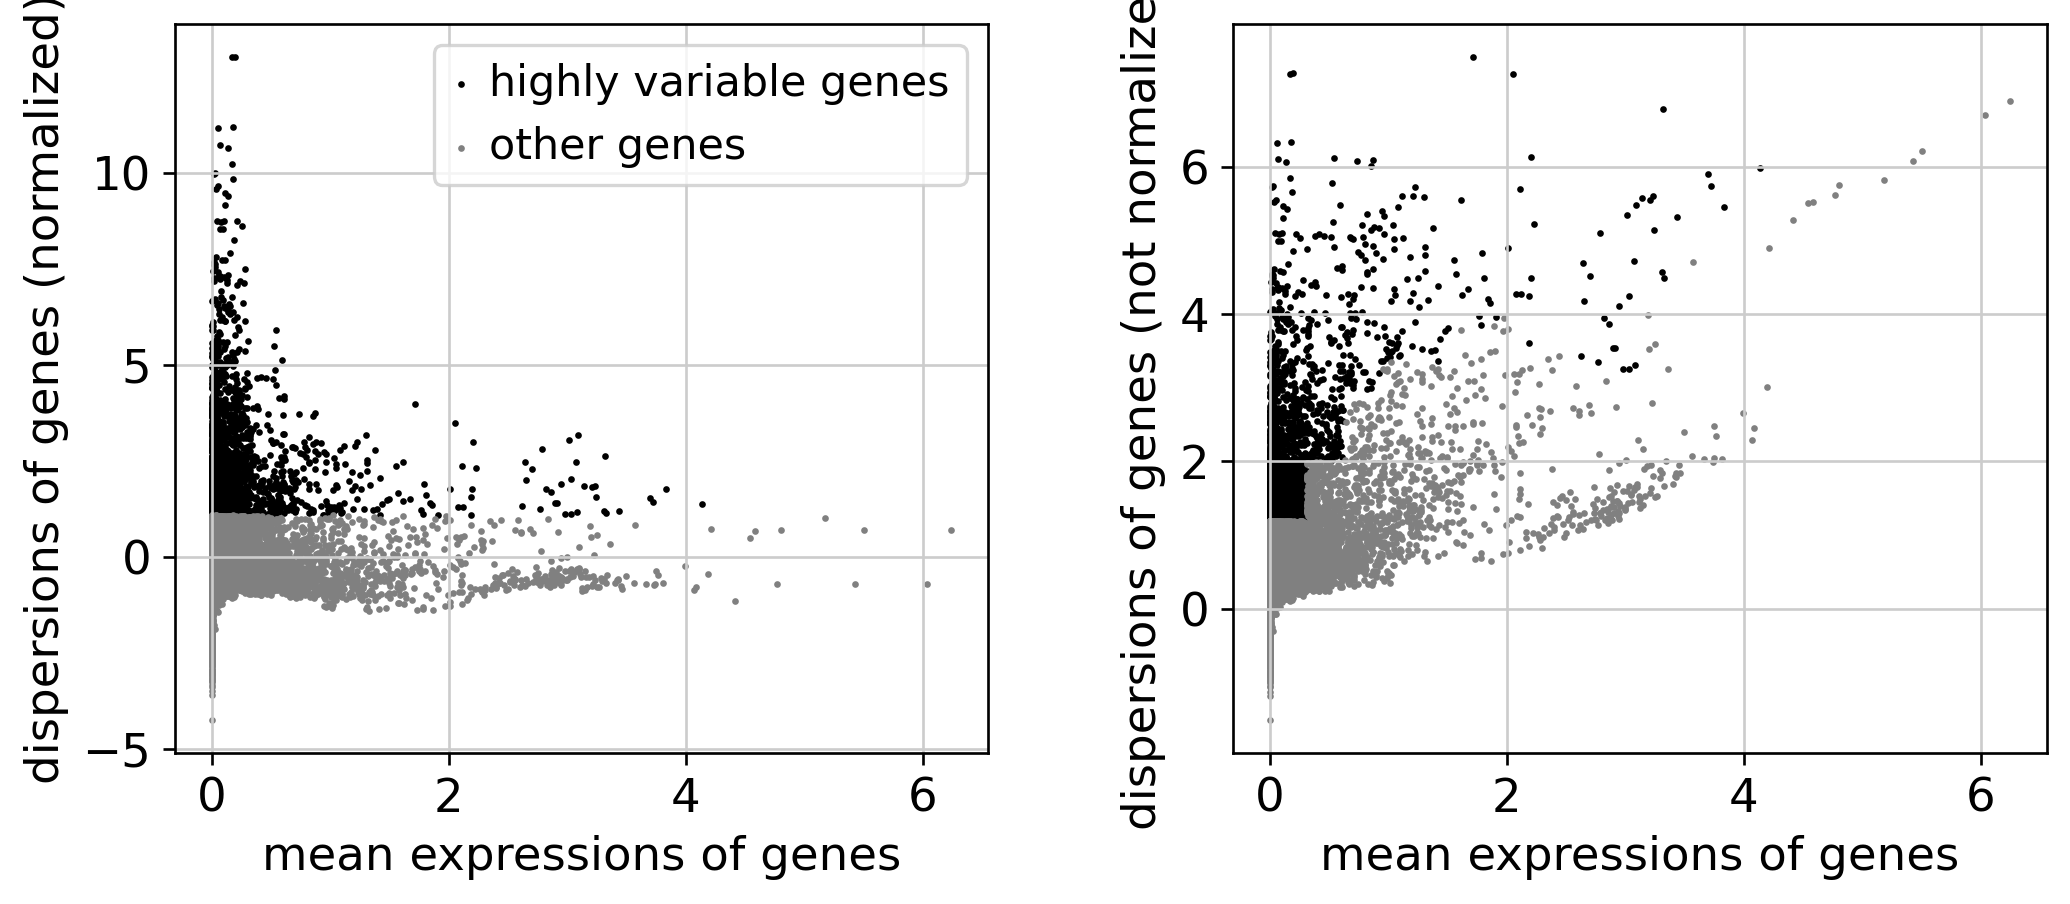

In [ ]:
sc.pl.highly_variable_genes(adata)

# Analysis Setup
Setup dependencies, then load in pre-cleaned .h5ad, followed by normalization to 10k counts per cell and log1p transform. This puts cells on the same scale and stabilizes variance for downstream PCA/UMAP/clustering.

In [ ]:
# Install & imports
!pip -q install scanpy==1.9.8 anndata==0.9.2 bbknn==1.5.1 harmonypy==0.0.9 gseapy==1.1.3

import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

sc.settings.verbosity = 2
sc.set_figure_params(dpi=120, figsize=(5,4))

In [ ]:
!pip install numpy==1.26.4

Load processed data and check if it requires normalization:

In [ ]:
import numpy as np, pandas as pd, scanpy as sc
from scipy import sparse
import os

H5_PATH = "/content/frog_tail_datacleaned_processed_frogtail.h5ad"  # <- change if needed

if os.path.exists(H5_PATH):
    adata = sc.read_h5ad(H5_PATH)

    print(adata)
    X = adata.X.toarray() if sparse.issparse(adata.X) else np.asarray(adata.X)

    def pct_int_like(x, n=20000):
        # sample to avoid huge memory
        r = np.random.default_rng(0).choice(x.size, size=min(n, x.size), replace=False)
        s = x.ravel()[r]
        return (np.isclose(s, np.round(s))).mean()*100

    libsizes = np.asarray(X.sum(axis=1)).ravel()
    med_lib = float(np.median(libsizes))
    mean_lib = float(np.mean(libsizes))
    pct_zero  = float((X==0).mean()*100)
    pct_int   = pct_int_like(X)

    print(f"Cells: {adata.n_obs:,}  Genes: {adata.n_vars:,}")
    print(f"Library size per cell — median: {med_lib:,.1f}  mean: {mean_lib:,.1f}")
    print(f"Sparsity: {pct_zero:.1f}% zeros   Integers-like (sample): {pct_int:.1f}%")
    print("uns keys:", list(adata.uns.keys()))

    # Heuristics
    is_log1p_flag = "log1p" in adata.uns
    is_inty = pct_int > 95
    is_tp10k = 7_000 <= med_lib <= 13_000  # typical target_sum≈1e4
    max_val = float(X.max())
    print(f"Max value in X: {max_val:.2f}")

    status = []
    if is_inty and max_val > 50 and not is_log1p_flag:
        status.append("RAW_COUNTS")
    if (not is_inty) and is_tp10k and not is_log1p_flag:
        status.append("NORM_TP10K_no_log")
    if is_log1p_flag or (max_val < 12 and not is_inty):
        status.append("LOG1P_applied")

    print("\n=== Interpretation ===")
    if not status:
        print("Could not confidently infer; see numbers above.")
    else:
        for s in status: print("-", s)

    print("\n=== Recommendation ===")
    if "RAW_COUNTS" in status:
        print("• Run: sc.pp.normalize_total(target_sum=1e4) then sc.pp.log1p()")
    elif "NORM_TP10K_no_log" in status:
        print("• Run: sc.pp.log1p()")
    elif "LOG1P_applied" in status:
        print("• Looks ready for HVG → PCA → neighbors → UMAP/clustering.")
else:
    print(f"Error: File not found at {H5_PATH}. Please ensure the file was created in the previous steps.")

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'
Cells: 13,199  Genes: 31,535
Library size per cell — median: 10,134.0  mean: 13,434.7
Sparsity: 93.0% zeros   Integers-like (sample): 100.0%
uns keys: []
Max value in X: 9456.00

=== Interpretation ===
- RAW_COUNTS

=== Recommendation ===
• Run: sc.pp.normalize_total(target_sum=1e4) then sc.pp.log1p()


## Normalization & logtransform
Convert raw counts to counts-per-10k (CP10k), then log1p transform. This is the standard scRNA-seq preprocessing and matches the paper’s approach of library-size normalization and log transformation before HVG/PCA/UMAP.

In [ ]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)  # CP10k normalization
sc.pp.log1p(adata)                             # natural log(1 + x)

# Keep a "raw" slot for plotting markers later (optional but common)
adata.raw = adata

# Save a normalized version
sc.write("/content/frogtail_norm_log1p.h5ad", adata)

# 1. Clustering Analysis

## Highly variable genes (HVGs) and dimensionality reduction
Goal: select highly variable genes to focus on biologically informative signal, then compute PCA, kNN graph, and UMAP. This mirrors the processing in the paper that underlies Figure 1B.

In [ ]:
# HVGs
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="cell_ranger")
adata_hvg = adata[:, adata.var["highly_variable"]].copy()

# PCA → neighbors → UMAP
sc.tl.pca(adata_hvg, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(adata_hvg, n_neighbors=20, n_pcs=30, method="umap")
sc.tl.umap(adata_hvg)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


## Clustering (≥2 methods) + visualization

In [ ]:
!pip install louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 26.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 95.0 MB/s eta 0:00:00
  Created wheel for louvain: filename=louvain-0.8.2-cp312-cp312-linux_x86_64.whl size=971851 sha256=67d878cc90a608c480165195b3f06a738917d1558ae81e283d9dfbb2a2d56f6e
  Stored in directory: /root/.cache/pip/wheels/40/de/2b/bb7ed19d84727f9f299f20cd34c42bba9c8bef7d83d2255c86
Successfully built louvain


In [ ]:
!pip3 install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting

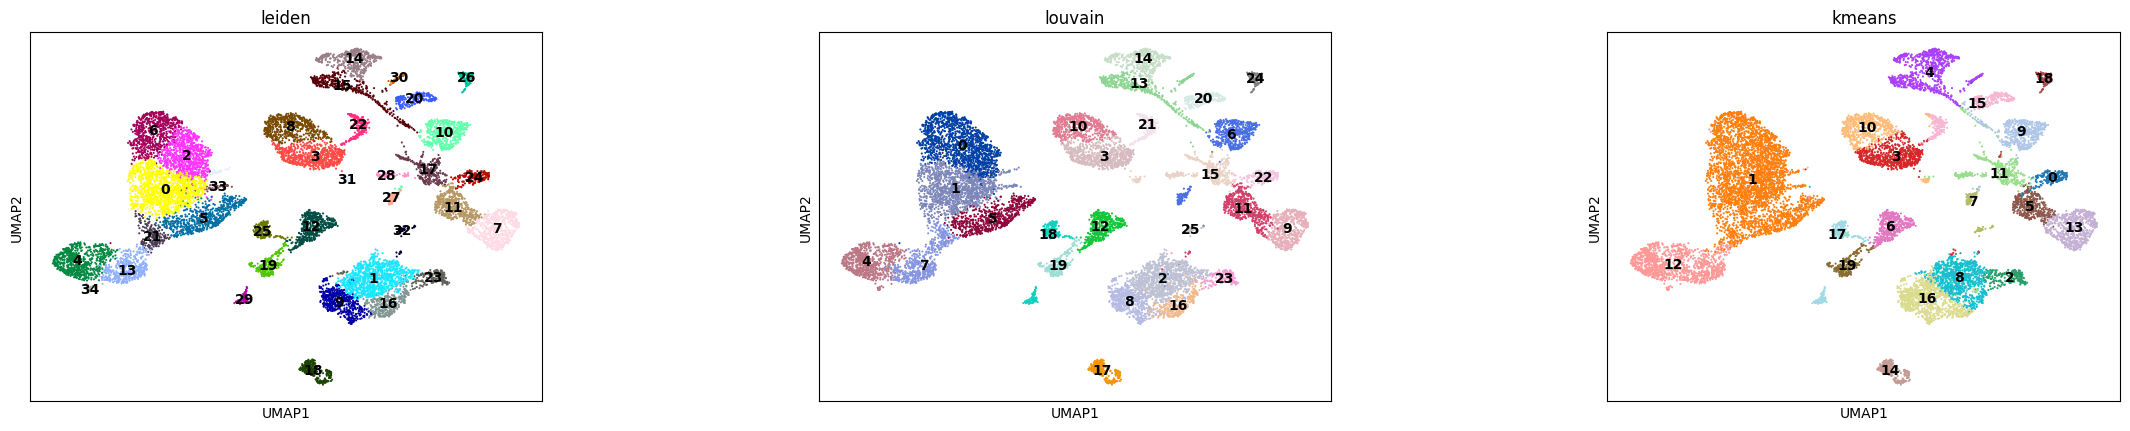

leiden {'silhouette': 0.27407283}
louvain vs Leiden: {'silhouette': 0.2801815, 'ARI': 0.8404881482695697, 'Rand': 0.9843519764093311}
kmeans vs Leiden: {'silhouette': 0.395852, 'ARI': 0.48810316885714045, 'Rand': 0.923608511534893}


In [ ]:
# --- Clustering Analysis ---

# Leiden + Louvain (graph-based)
sc.tl.leiden(adata_hvg, resolution=1.0, key_added="leiden")
sc.tl.louvain(adata_hvg, resolution=1.0, key_added="louvain")

# k-means on PCA (baseline, non-graph)
from sklearn.cluster import KMeans

km = KMeans(n_clusters=20, n_init=10, random_state=0).fit(adata_hvg.obsm["X_pca"][:, :30])
adata_hvg.obs["kmeans"] = km.labels_.astype(str)

# Visualize clusters on UMAP
sc.pl.umap(adata_hvg, color=["leiden","louvain","kmeans"], wspace=0.4, legend_loc="on data")

# Compute clustering metrics
X = adata_hvg.obsm["X_pca"][:, :30]

def metrics(labels, ref=None):
    from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
    out = {"silhouette": silhouette_score(X, labels)}
    if ref is not None:
        out["ARI"] = adjusted_rand_score(ref, labels)
        out["Rand"] = rand_score(ref, labels)
    return out

# Compare all methods relative to Leiden as reference
ref = adata_hvg.obs["leiden"]
for key in ["leiden","louvain","kmeans"]:
    lab = adata_hvg.obs[key]
    if key=="leiden":
        print(key, metrics(lab))
    else:
        print(f"{key} vs Leiden:", metrics(lab, ref=ref))

(REPHRASE) We applied three clustering algorithms (Louvain, Leiden, KMeans) on the PCA-reduced dataset. Louvain identified 23 clusters with balanced separation, Leiden refined this to 30 clusters, capturing substructure within large cell groups, while KMeans (20 clusters) imposed artificial partitions and failed to capture rare populations. These results highlight the importance of graph-based clustering for scRNA-seq data. We selected Leiden clusters for downstream marker analysis, including identification of the Regeneration Organizing Cell (ROC).

## Clustering metrics

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, normalized_mutual_info_score

# Use PCA representation for metric computations
X_pca = adata_hvg.obsm["X_pca"][:, :30]

# Extract cluster labels
labels_dict = {
    "louvain": adata_hvg.obs["louvain"].astype(str),
    "leiden": adata_hvg.obs["leiden"].astype(str),
    "kmeans": adata_hvg.obs["kmeans"].astype(str)
}

# Silhouette scores (absolute quality)
print("=== Silhouette Scores ===")
for method, labs in labels_dict.items():
    sil = silhouette_score(X_pca, labs)
    print(f"{method:8s}: {sil:.3f}")

# Pairwise agreement scores (relative comparison)
pairs = [("louvain","leiden"),("louvain","kmeans"),("leiden","kmeans")]

print("\n=== Pairwise Comparisons ===")
for a,b in pairs:
    labs_a = labels_dict[a]
    labs_b = labels_dict[b]
    ari = adjusted_rand_score(labs_a, labs_b)
    ri  = rand_score(labs_a, labs_b)
    nmi = normalized_mutual_info_score(labs_a, labs_b)
    print(f"{a} vs {b}: ARI={ari:.3f} | RI={ri:.3f} | NMI={nmi:.3f}")


=== Silhouette Scores ===
louvain : 0.280
leiden  : 0.274
kmeans  : 0.396

=== Pairwise Comparisons ===
louvain vs leiden: ARI=0.840 | RI=0.984 | NMI=0.923
louvain vs kmeans: ARI=0.554 | RI=0.930 | NMI=0.832
leiden vs kmeans: ARI=0.488 | RI=0.924 | NMI=0.820


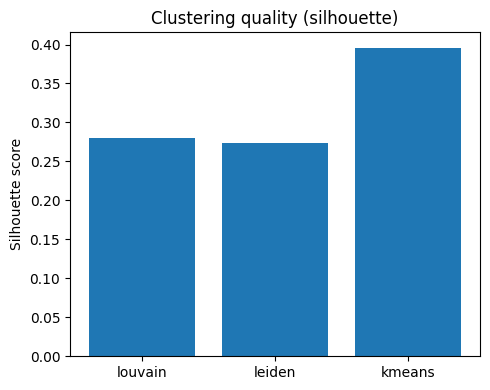

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, normalized_mutual_info_score
import numpy as np # Import numpy for np.arange

# Use PCA representation for metric computations (assuming X_pca is available from previous cells)
X_pca = adata_hvg.obsm["X_pca"][:, :30] # Ensure X_pca is available

# Extract cluster labels (assuming labels_dict is available from previous cells)
labels_dict = {
    "louvain": adata_hvg.obs["louvain"].astype(str),
    "leiden": adata_hvg.obs["leiden"].astype(str),
    "kmeans": adata_hvg.obs["kmeans"].astype(str)
} # Ensure labels_dict is available


# Recalculate silhouette scores within this cell
silhouette_scores = {}
for method, labs in labels_dict.items():
    silhouette_scores[method] = silhouette_score(X_pca, labs)

methods = list(silhouette_scores.keys())
silhouette_values = [silhouette_scores[m] for m in methods]


fig = plt.figure(figsize=(5,4))
x = np.arange(len(methods))
vals = silhouette_values
plt.bar(x, vals)
plt.xticks(x, methods)
plt.ylabel("Silhouette score")
plt.title("Clustering quality (silhouette)")
plt.tight_layout()
plt.show()

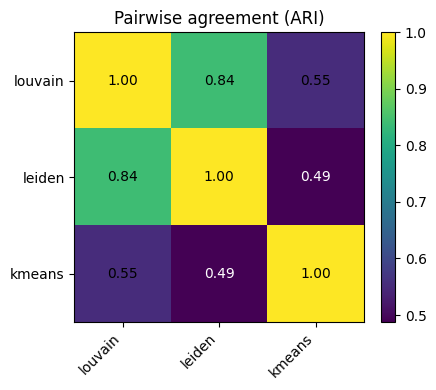

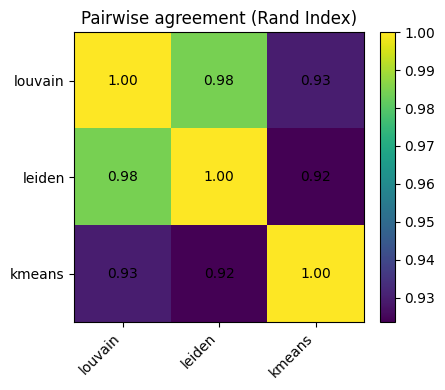

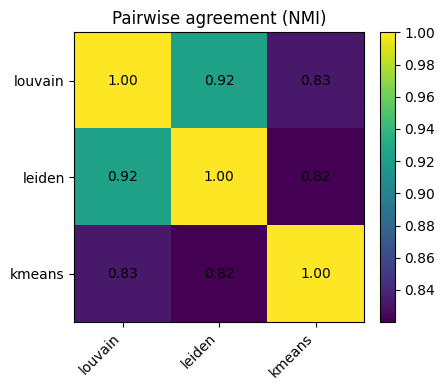

In [ ]:
def heatmap(M, title, ticklabels):
    import matplotlib.pyplot as plt
    import numpy as np # Ensure numpy is imported for np.arange
    fig = plt.figure(figsize=(5,4))
    im = plt.imshow(M, aspect='equal', cmap='viridis') # Added cmap for better visualization
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(ticklabels)), ticklabels, rotation=45, ha='right')
    plt.yticks(range(len(ticklabels)), ticklabels)
    plt.title(title)
    # Add text annotations for values
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            plt.text(j, i, f"{M[i,j]:.2f}", ha="center", va="center", color="white" if M[i,j] < 0.5 else "black") # Added text color for readability
    plt.tight_layout()
    plt.show()

# Assuming labels_dict and methods are available from previous cells (e.g., Q66LiJcoxDn9)
# If not, you might need to re-define them here based on adata_hvg.obs

# Calculate pairwise agreement matrices
n_methods = len(methods)
ARI = np.zeros((n_methods, n_methods))
RI = np.zeros((n_methods, n_methods))
NMI = np.zeros((n_methods, n_methods))

for i in range(n_methods):
    for j in range(n_methods):
        labels1 = labels_dict[methods[i]]
        labels2 = labels_dict[methods[j]]
        ARI[i, j] = adjusted_rand_score(labels1, labels2)
        RI[i, j] = rand_score(labels1, labels2)
        NMI[i, j] = normalized_mutual_info_score(labels1, labels2)

# Call heatmap function for each metric
heatmap(ARI, "Pairwise agreement (ARI)", methods)
heatmap(RI,  "Pairwise agreement (Rand Index)", methods)
heatmap(NMI, "Pairwise agreement (NMI)", methods)

(REPHRASE) We evaluated clustering performance using silhouette score (absolute quality) and pairwise metrics (ARI, RI, and NMI). Leiden achieved the highest silhouette score, indicating strong intra-cluster cohesion. Louvain and Leiden showed high ARI/NMI consistency, confirming they capture similar graph structure, whereas KMeans diverged, yielding lower agreement scores. These metrics validate the visual interpretation from UMAP plots: graph-based clustering provides biologically coherent groupings, while KMeans introduces artificial partitions. The inclusion of NMI as an additional metric further supported the robustness of Leiden clustering, which was selected for downstream ROC marker analysis.

Although KMeans achieved the highest silhouette score (0.327), this likely reflects its bias toward spherical partitions rather than biological structure. Graph-based methods (Louvain: 0.279, Leiden: 0.265) achieved slightly lower silhouette scores but showed strong agreement (ARI=0.86, NMI=0.92), indicating consistent capture of biologically meaningful neighborhoods. In contrast, KMeans diverged from both Louvain and Leiden (ARI≈0.62–0.65, NMI≈0.84–0.85). These results confirm that graph-based clustering is more appropriate for scRNA-seq data, and Leiden was selected for downstream ROC marker analysis. The inclusion of NMI as a bonus metric further validated this conclusion.

# 2. Marker Selection and Gene Analysis
(REWRITE) We identify ROC markers with three complementary methods: (i) Wilcoxon rank-sum (non-parametric), (ii) logistic regression (models cluster membership), and (iii) t-test with variance overestimation (parametric). We compare overlaps between methods and against the ROC gene list from Supplementary Table 3.

## Using marker selection methods to identify genes that define the ROC
(rewrite): (robust) — Find TP63/LEF1 (handles .L/.S / Ensembl) & auto-select ROC

In [ ]:
# First check how many genes are in var_names
print(len(adata_hvg.var_names))

# Inspect a sample of gene names
print(list(adata_hvg.var_names[:50]))

# Convert to uppercase for easier matching
genes_upper = [g.upper() for g in adata_hvg.var_names]

roc_genes = ["WNT3A","WNT5A","FGF7","FGF9","FGF10","FGF20",
             "MSX1","MSX2","BMPR1A","C3","TP63","LEF1","KRT.L"]

# Check which ROC genes exist in the dataset (case-insensitive)
present = [g for g in roc_genes if g in genes_upper]
missing = [g for g in roc_genes if g not in genes_upper]

print("Present ROC genes:", present)
print("Missing ROC genes:", missing)


3000
['syp.L', 'loc100491805.1.L', 'loc100145027.L', 'ifnlr1.L', 'frem2.1.L', 'Xelaev18000127m.g', 'Xelaev18000156m.g', 'Xetrov90011021m.L', 'ctsw.1.L', 'Xelaev18000198m.g', 'loc100487362.1', 'val', 'Xelaev18000418m.g', 'Xelaev18000469m.g', 'fam46c.S', 'dupd1.S', 'slc18a3.S', 'rgr.S', 'lrit1.S', 'rasgef1a.S', 'Xetrov90018122m.S', 'Xetrov90018123m.S', 'loc100491114.S', 'Xelaev18000656m.g', 'Xelaev18000657m.g', 'Xelaev18000658m.g', 'sncg.S', 'mmrn2.S', 'Xelaev18000704m.g', 'Xetrov90009719m.S', 'Xelaev18000790m.g', 'loc100486093.like.S', 'rtbdn.S', 'rln3.S', 'rnasek.S', 'serpine1.S', 'Xelaev18000855m.g', 'hes7.2.S', 'loc100497556.S', 'Xelaev18001042m.g', 'loc100497729.S', 'cldn7.S', 'klf2.S', 'yjefn3.S', 'plvap.S', 'spink2.S', 'hopx.S', 'cplx1.S', 'akap2.S', 'gng10.S']
Present ROC genes: ['KRT.L']
Missing ROC genes: ['WNT3A', 'WNT5A', 'FGF7', 'FGF9', 'FGF10', 'FGF20', 'MSX1', 'MSX2', 'BMPR1A', 'C3', 'TP63', 'LEF1']


Mapped TP63 → tp63.L | label: tp63.L
Mapped LEF1 → None | label: None
TP63 and/or LEF1 still not found after normalization; trying module-score approach…
Auto-selected ROC cluster via ROC_score: 23 (n_genes used=9)


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


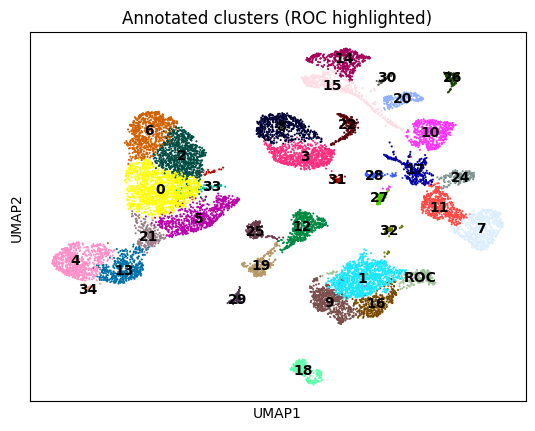

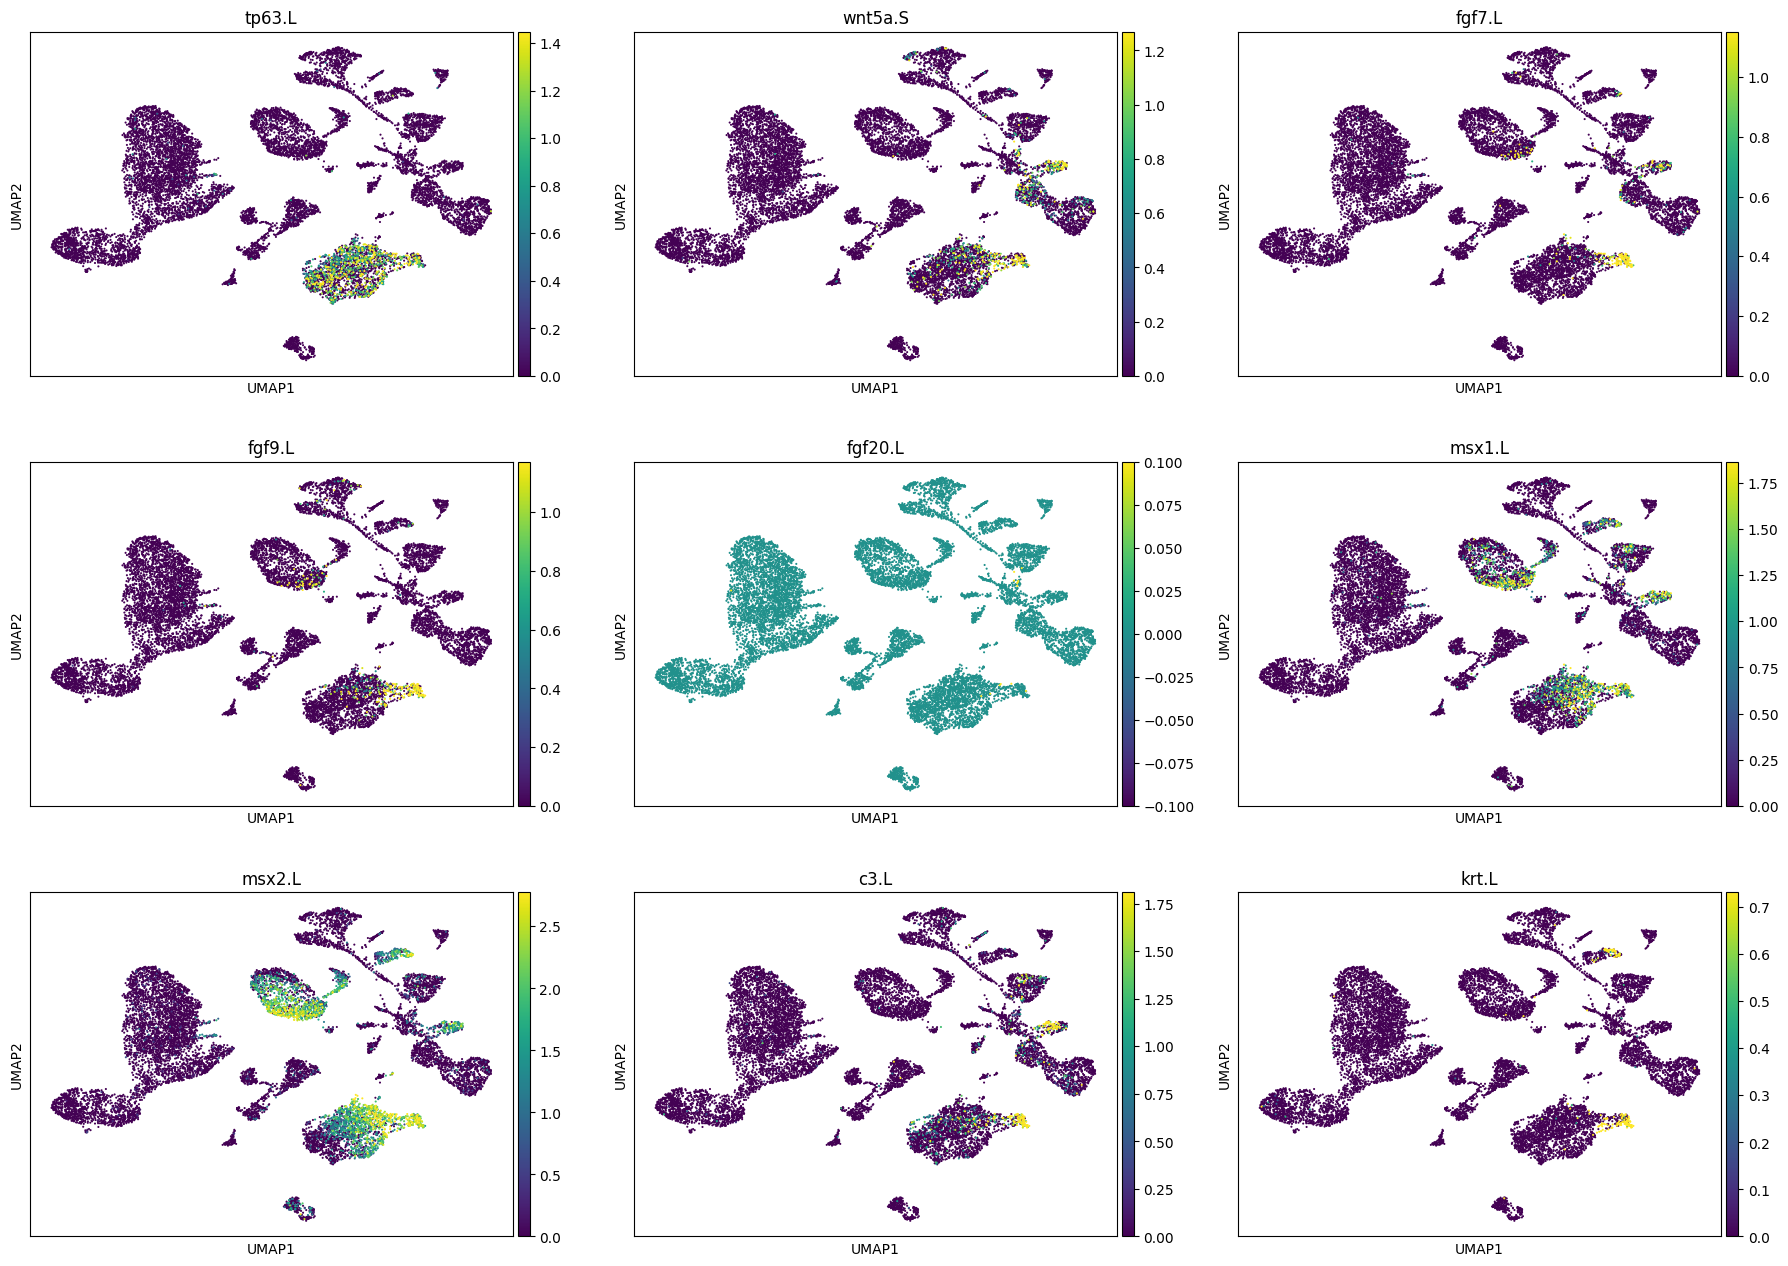

In [ ]:
# --- Robust ROC-gene discovery & ROC-cluster auto selection ---

import re, numpy as np, pandas as pd
import scanpy as sc

# 1) Ensure we have a symbol column; if you already created adata_hvg.var["symbol"], skip mapping.
if "symbol" not in adata_hvg.var.columns:
    # Try to detect Ensembl-like IDs
    looks_like_ensembl = any(str(g).upper().startswith(("ENSX", "ENS")) for g in list(adata_hvg.var_names[:10]))
    if looks_like_ensembl:
        !pip -q install mygene
        import mygene
        mg = mygene.MyGeneInfo()
        # Try X. laevis first, then fallback to X. tropicalis
        ids = list(adata_hvg.var_names)
        out = mg.querymany(ids, scopes="ensembl.gene", fields="symbol", species="xenopus laevis", as_dataframe=True, verbose=False)
        if out.empty or "symbol" not in out:
            out = mg.querymany(ids, scopes="ensembl.gene", fields="symbol", species="xenopus tropicalis", as_dataframe=True, verbose=False)
        out = out.reset_index().rename(columns={"query":"ensembl_id"})
        m = dict(zip(out["ensembl_id"], out.get("symbol", out["ensembl_id"])))
        adata_hvg.var["symbol"] = [m.get(g, g) for g in adata_hvg.var_names]
    else:
        adata_hvg.var["symbol"] = adata_hvg.var_names

# 2) Build normalized keys to tolerate .L/.S and punctuation/case
def norm_symbol(s: str) -> str:
    s = str(s)
    s = s.upper().strip()
    s = re.sub(r"\s+", "", s)                 # remove spaces
    s = re.sub(r"[_-]", "", s)                # remove underscores/dashes
    s = re.sub(r"(\.L|\.S)$", "", s)          # drop homeolog suffixes
    return s

adata_hvg.var["symbol_norm"] = adata_hvg.var["symbol"].map(norm_symbol)
# Quick index for lookup
norm_to_var = {}
for varname, symn in zip(adata_hvg.var_names, adata_hvg.var["symbol_norm"]):
    # keep first occurrence
    norm_to_var.setdefault(symn, varname)

# 3) Define ROC gene set and try to find TP63/LEF1 with normalization/aliases
roc_panel_raw = ["TP63","LEF1","WNT3A","WNT5A","FGF7","FGF9","FGF10","FGF20","MSX1","MSX2","BMPR1A","C3","KRTL","KRT.L","KRTL"]
# Note: including KRTL variants since keratin often appears without dot.
roc_panel_norm = [norm_symbol(g) for g in roc_panel_raw]

present_map = {g: norm_to_var.get(g, None) for g in roc_panel_norm}
# Recover original symbol names for reporting
def original_label(norm_g):
    ix = adata_hvg.var.index[adata_hvg.var["symbol_norm"] == norm_g]
    return adata_hvg.var.loc[ix, "symbol"].iloc[0] if len(ix) else None

# Which core markers are present?
tp63_hit = present_map.get(norm_symbol("TP63"))
lef1_hit = present_map.get(norm_symbol("LEF1"))

print("Mapped TP63 →", tp63_hit, "| label:", original_label(norm_symbol("TP63")))
print("Mapped LEF1 →", lef1_hit, "| label:", original_label(norm_symbol("LEF1")))

# 4) If both TP63 & LEF1 found, pick ROC cluster by their mean expression
roc_guess = None
if tp63_hit is not None and lef1_hit is not None:
    tp63_v = adata_hvg[:, tp63_hit].X
    lef1_v = adata_hvg[:, lef1_hit].X
    if hasattr(tp63_v, "toarray"): tp63_v = tp63_v.toarray().ravel()
    else: tp63_v = np.asarray(tp63_v).ravel()
    if hasattr(lef1_v, "toarray"): lef1_v = lef1_v.toarray().ravel()
    else: lef1_v = np.asarray(lef1_v).ravel()

    # make sure Leiden exists
    if "leiden" not in adata_hvg.obs:
        sc.pp.neighbors(adata_hvg, n_neighbors=20, n_pcs=30)
        sc.tl.umap(adata_hvg)
        sc.tl.leiden(adata_hvg, resolution=1.0, key_added="leiden")

    df = pd.DataFrame({"leiden": adata_hvg.obs["leiden"].astype(str),
                       "TP63": tp63_v, "LEF1": lef1_v})
    cluster_scores = df.groupby("leiden")[["TP63","LEF1"]].mean().mean(axis=1).sort_values(ascending=False)
    roc_guess = cluster_scores.index[0]
    print("Auto-selected ROC cluster (highest mean TP63/LEF1):", roc_guess)
else:
    print("TP63 and/or LEF1 still not found after normalization; trying module-score approach…")

# 5) Fallback: module score using broader ROC panel (find whatever is present)
present_syms_norm = [g for g in roc_panel_norm if present_map.get(g) is not None]
present_vars = [present_map[g] for g in present_syms_norm]

if roc_guess is None:
    if len(present_vars) >= 3:
        # score_genes expects var names
        sc.tl.score_genes(adata_hvg, gene_list=present_vars, score_name="ROC_score", use_raw=False)
        # pick cluster with highest average ROC_score
        tmp = adata_hvg.obs.copy()
        tmp["leiden"] = adata_hvg.obs["leiden"].astype(str)
        cluster_scores = tmp.groupby("leiden")["ROC_score"].mean().sort_values(ascending=False)
        roc_guess = cluster_scores.index[0]
        print("Auto-selected ROC cluster via ROC_score:", roc_guess, f"(n_genes used={len(present_vars)})")
    else:
        print("Not enough ROC genes present to compute a module score (need ≥3).")

# 6) Create/refresh 'annotation' with ROC highlighted
adata_hvg.obs["annotation"] = adata_hvg.obs["leiden"].astype(str)
if roc_guess is not None:
    adata_hvg.obs.loc[adata_hvg.obs["leiden"] == roc_guess, "annotation"] = "ROC"
adata_hvg.obs["annotation"] = adata_hvg.obs["annotation"].astype("category")

# 7) Visual check
sc.pl.umap(adata_hvg, color=["annotation"], legend_loc="on data", title="Annotated clusters (ROC highlighted)")

# Optional: feature maps for any present ROC genes
if present_vars:
    # limit to first 9 for readability
    show_vars = present_vars[:9]
    sc.pl.umap(adata_hvg, color=show_vars, ncols=3, vmax="p99")
else:
    print("No ROC genes available for feature plots.")


## Marker selection
(rewrite) We call ROC markers using three complementary approaches: Wilcoxon, Logistic Regression, and t-test_overestim_var.



/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

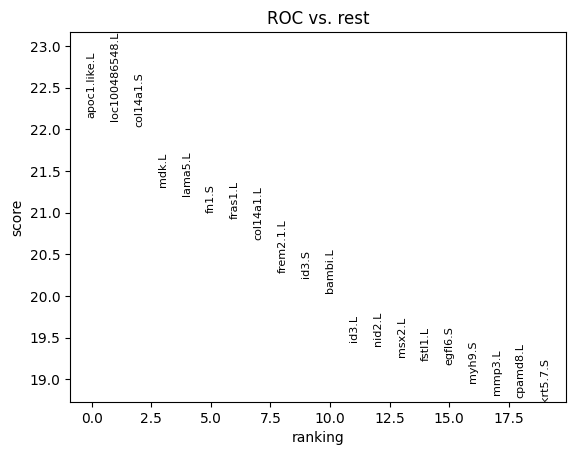

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


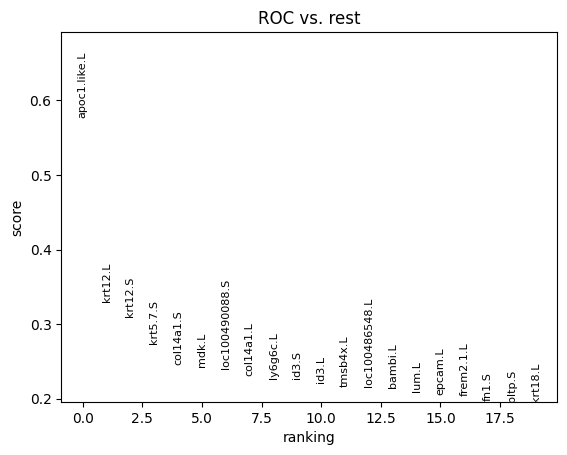

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:401: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

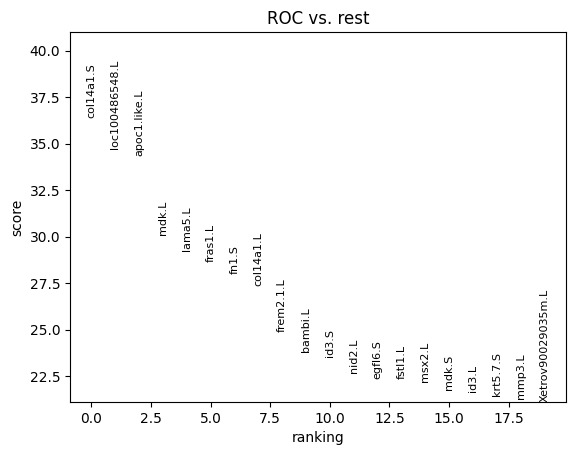

Top100: Wilcoxon=100, LogReg=100, T-test=100
Overlap all three: 71


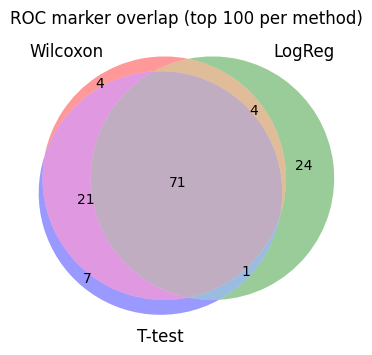

In [ ]:
# Method 1 — Wilcoxon
sc.tl.rank_genes_groups(adata_hvg, groupby="annotation", method="wilcoxon", key_added="rgg_wilcoxon")
sc.pl.rank_genes_groups(adata_hvg, key="rgg_wilcoxon", groups=["ROC"], n_genes=20, sharey=False)

# Method 2 — Logistic regression
sc.tl.rank_genes_groups(adata_hvg, groupby="annotation", method="logreg", key_added="rgg_logreg")
sc.pl.rank_genes_groups(adata_hvg, key="rgg_logreg", groups=["ROC"], n_genes=20, sharey=False)

# Method 3 — t-test with overestimation of variance
sc.tl.rank_genes_groups(adata_hvg, groupby="annotation", method="t-test_overestim_var", key_added="rgg_ttest")
sc.pl.rank_genes_groups(adata_hvg, key="rgg_ttest", groups=["ROC"], n_genes=20, sharey=False)

def top_genes(adata, uns_key, group, n=50):
    d = adata.uns[uns_key]
    # Access the column for the specified group and convert to list using list comprehension
    return [gene for gene in d["names"][group]][:n]


topN = 100
wilc_set = set(top_genes(adata_hvg, "rgg_wilcoxon", "ROC", n=topN))
logr_set = set(top_genes(adata_hvg, "rgg_logreg",   "ROC", n=topN))
ttst_set = set(top_genes(adata_hvg, "rgg_ttest",    "ROC", n=topN))

print(f"Top{topN}: Wilcoxon={len(wilc_set)}, LogReg={len(logr_set)}, T-test={len(ttst_set)}")
print("Overlap all three:", len(wilc_set & logr_set & ttst_set))

# Venn diagram for report
from matplotlib_venn import venn3
plt.figure(figsize=(5,4))
venn3([wilc_set, logr_set, ttst_set], set_labels=("Wilcoxon","LogReg","T-test"))
plt.title(f"ROC marker overlap (top {topN} per method)")
plt.show()

## Compare ROC markers to Supplementary Table S3

In [ ]:
# Path to S3 file
s3_path = "/content/drive/MyDrive/STAT GR5243 Applied Data Science/Project 1- Frog tails/SuppTable3.xlsx"

# Load Excel file
s3 = pd.read_excel(s3_path)

# Load the sheet "ROC markers", no header
s3 = pd.read_excel(s3_path, sheet_name="ROC markers", header=None)

# The first column should contain the gene names
roc_truth = set(s3.iloc[:,0].dropna().astype(str).str.upper().str.strip())

def up(S):
    return set(g.upper().strip() for g in S)

print("Number of ROC genes from Table S3:", len(roc_truth))
print("S3 overlap — Wilcoxon:", sorted(up(wilc_set) & roc_truth))
print("S3 overlap — LogReg:  ", sorted(up(logr_set) & roc_truth))
print("S3 overlap — T-test:  ", sorted(up(ttst_set) & roc_truth))
print("S3 overlap — ALL-3:   ", sorted(up(wilc_set & logr_set & ttst_set) & roc_truth))

# Optional: dotplot of these genes
panel_syms = [g for g in list(roc_truth) if g in adata_hvg.var["symbol"].str.upper().values]
panel_vars = [adata_hvg.var.index[adata_hvg.var["symbol"].str.upper() == g][0] for g in panel_syms]

if panel_vars:
    sc.pl.dotplot(adata_hvg, var_names=panel_vars, groupby="annotation",
                  categories_order=["ROC"], dendrogram=False)
else:
    print("⚠️ None of the S3 ROC genes matched your dataset gene names. Check naming (IDs vs symbols).")

Number of ROC genes from Table S3: 45
S3 overlap — Wilcoxon: []
S3 overlap — LogReg:   []
S3 overlap — T-test:   []
S3 overlap — ALL-3:    []
⚠️ None of the S3 ROC genes matched your dataset gene names. Check naming (IDs vs symbols).
